In [29]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

from pytket import Circuit, OpType, Qubit

# circ = Circuit(2, 2)
# circ.Measure(0, 0)
# # Actively reset state to |0>
# circ.Reset(0)
# # Conditionally flip state to |1> to reflect measurement result
# circ.X(0, condition_bits=[0], condition_value=1)
# # Use the qubit as if the measurement was non-destructive
# circ.CX(0, 1)


from pytket import Circuit, Qubit, Bit

circ = Circuit()
# qreg = circ.add_q_register("reg", 2)    # add a qubit register

circ.add_qubit(Qubit('reg'))

anc = Qubit("ancilla")                  # add a named qubit
circ.add_qubit(anc)

par = Bit("parity", [0, 0])             # add a named bit with a 2D index
circ.add_bit(par)

# circ.CX(qreg[0], anc)                   # add gates in terms of IDs
# circ.CX(qreg[1], anc)
circ.Measure(anc, par)

[Measure ancilla --> parity[0, 0]; ]

In [30]:
render_circuit_jupyter(circ)

In [27]:
type(qreg.to_list()[0])

pytket._tket.unit_id.Qubit

In [ ]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter as draw
from pytket.circuit.display import view_browser

circ1 = Circuit()
j = circ1.add_q_register("j", 1)
circ1.Y(j[0])

circ2 = Circuit()
k = circ2.add_q_register("k", 2)
circ2.X(k[1])
circ2.CRz(0.64, k[1], k[0])

# circ3 = circ1 * circ2 # Take the tensor product
circ3 = circ1.copy()
circ3.append(circ2)

draw(circ3)

In [45]:
circ1 = Circuit(2)
circ1.H(0)
circ1.CX(0, 1)

circ2 = Circuit(2)
circ2.H(0)
circ2.CX(0, 1)

[H q[0]; CX q[0], q[1]; ]

In [46]:
circ1.add_circuit(circ2, [1, 0])

draw(circ1)

In [49]:
from pytket.utils import Graph

In [51]:
Graph(circ1).view_DAG()

'/var/folders/r5/1qhftv4d3_g432jmyr9vy6wc0000gn/T/tmpfths7cb1'

In [52]:
from pytket.circuit import ToffoliBox

In [55]:
circ = Circuit(3)
for _ in range(3):
    circ.H(_)
circ.add_gate(ToffoliBox([0,1,2]), [0, 1, 2])

TypeError: __init__(): incompatible function arguments. The following argument types are supported:
    1. __init__(self, permutation: collections.abc.Sequence[tuple[collections.abc.Sequence[bool], collections.abc.Sequence[bool]]], strat: pytket._tket.circuit.ToffoliBoxSynthStrat, rotation_axis: pytket._tket.circuit.OpType = OpType.Ry) -> None
    2. __init__(self, permutation: collections.abc.Sequence[tuple[collections.abc.Sequence[bool], collections.abc.Sequence[bool]]], rotation_axis: pytket._tket.circuit.OpType = OpType.Ry) -> None
    3. __init__(self, n_qubits: int, permutation: collections.abc.Sequence[tuple[collections.abc.Sequence[bool], collections.abc.Sequence[bool]]], rotation_axis: pytket._tket.circuit.OpType = OpType.Ry) -> None
    4. __init__(self, permutation: collections.abc.Mapping[collections.abc.Sequence[bool], collections.abc.Sequence[bool]], strat: pytket._tket.circuit.ToffoliBoxSynthStrat, rotation_axis: pytket._tket.circuit.OpType = OpType.Ry) -> None
    5. __init__(self, permutation: collections.abc.Mapping[collections.abc.Sequence[bool], collections.abc.Sequence[bool]], rotation_axis: pytket._tket.circuit.OpType = OpType.Ry) -> None
    6. __init__(self, n_qubits: int, permutation: collections.abc.Mapping[collections.abc.Sequence[bool], collections.abc.Sequence[bool]], rotation_axis: pytket._tket.circuit.OpType = OpType.Ry) -> None

Invoked with types: pytket._tket.circuit.ToffoliBox, list

In [56]:
from pytket.circuit import Circuit, Unitary1qBox, Unitary2qBox
import numpy as np

u1 = np.asarray([[2/3, (-2+1j)/3],
                    [(2+1j)/3, 2/3]])
u1box = Unitary1qBox(u1)

u2 = np.asarray([[0, 1, 0, 0],
                    [0, 0, 0, -1],
                    [1, 0, 0, 0],
                    [0, 0, -1j, 0]])
u2box = Unitary2qBox(u2)

circ = Circuit(3)
circ.add_unitary1qbox(u1box, 0)
circ.add_unitary2qbox(u2box, 1, 2)
circ.add_unitary1qbox(u1box, 2)
circ.add_unitary2qbox(u2box, 1, 0)

draw(circ)

In [66]:
from pytket.circuit import QControlBox, CircBox
from pytket.passes import DecomposeBoxes
from scipy.stats import unitary_group

circ = Circuit(3)
from pytket.circuit import Op, OpType, QControlBox

op = Op.create(OpType.S)
ccs = QControlBox(op, 2)


circ_box = Circuit(2)
circ_box.H(0).CX(0, 1)
circ_box = CircBox(circ_box)
su4 = Unitary2qBox(unitary_group.rvs(4))  # Random 2-qubit unitary
c_su4 = QControlBox(circ_box, 1)
circ.add_gate(c_su4, [0, 1, 2])  # Control on qubit 2
circ.add_gate(ccs, [0, 1, 2])  # Control on qubit 1
draw(circ)


In [67]:
DecomposeBoxes().apply(circ)
draw(circ)

In [72]:
draw(ccs.get_circuit())

In [73]:
from pytket.circuit import StatePreparationBox

w_state = 1 / np.sqrt(3) * np.array([0, 1, 1, 0, 1, 0, 0, 0])

w_state_box = StatePreparationBox(w_state)

state_circ = Circuit(3)
state_circ.add_gate(w_state_box, [0, 1, 2])

[StatePreparationBox q[0], q[1], q[2]; ]

In [75]:
DecomposeBoxes().apply(state_circ)
draw(state_circ)

In [ ]:
from pytket.circuit import ToffoliBox

# Specify the desired permutation of the basis states
mapping = {
    (False, False, True): (True, True, True),
    (True, True, True): (False, False, True),
    (True, False, False): (False, False, False),
    (False, False, False): (True, False, False),
}

# Define box to perform the permutation
perm_box = ToffoliBox(permutation=mapping)
draw(perm_box.get_circuit())

In [80]:
from pytket.utils.symbolic import circuit_apply_symbolic_statevector, circuit_to_symbolic_unitary, circuit_apply_symbolic_qubit
from sympy import Symbol, pi

a = Symbol("alpha")
circ = Circuit(2)
circ.Rx(a/pi, 0).CX(0, 1)

# All zero input state is assumed if no initial state is provided
display(circuit_apply_symbolic_statevector(circ))
circuit_to_symbolic_unitary(circ)

Matrix([
[   cos(alpha/2)],
[              0],
[              0],
[-I*sin(alpha/2)]])

Matrix([
[   cos(alpha/2),               0, -I*sin(alpha/2),               0],
[              0,    cos(alpha/2),               0, -I*sin(alpha/2)],
[              0, -I*sin(alpha/2),               0,    cos(alpha/2)],
[-I*sin(alpha/2),               0,    cos(alpha/2),               0]])

In [ ]:
from pytket.circuit import OpType, Qubit
from pytket.tableau import UnitaryTableau

tab = UnitaryTableau(3)
tab.apply_gate_at_end(OpType.S, [Qubit(0)])
tab.apply_gate_at_end(OpType.CX, [Qubit(1), Qubit(2)])
print(tab)

X@q[0]	->	1 0 0   1 0 0   0
X@q[1]	->	0 1 1   0 0 0   0
X@q[2]	->	0 0 1   0 0 0   0
--
Z@q[0]	->	0 0 0   1 0 0   0
Z@q[1]	->	0 0 0   0 1 0   0
Z@q[2]	->	0 0 0   0 1 1   0



In [97]:
tab.get_xrow(Qubit(0))

(Yq[0], Iq[1], Iq[2])

In [104]:
from pytket.circuit import Circuit
from pytket.tableau import UnitaryTableauBox

box = UnitaryTableauBox(
    np.asarray([[1, 1, 0], [0, 1, 0], [0, 0, 1]], dtype=bool),
    np.asarray([[0, 0, 0], [0, 0, 0], [0, 0, 1]], dtype=bool),
    np.asarray([0, 0, 1], dtype=bool),
    np.asarray([[0, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=bool),
    np.asarray([[1, 0, 0], [1, 1, 0], [0, 0, 1]], dtype=bool),
    np.asarray([1, 0, 1], dtype=bool)
)

print(box.get_tableau())

circ = Circuit(3)
circ.add_gate(box, [0, 1, 2])
draw(circ)

X@q[0]	->	1 1 0   0 0 0   0
X@q[1]	->	0 1 0   0 0 0   0
X@q[2]	->	0 0 1   0 0 1   1
--
Z@q[0]	->	0 0 0   1 0 0   1
Z@q[1]	->	0 1 0   1 1 0   0
Z@q[2]	->	0 0 0   0 0 1   1



In [ ]:
from pytket.passes import DecomposeBoxes, RemoveRedundancies, CliffordSimp

DecomposeBoxes().apply(circ)
RemoveRedundancies().apply(circ) # Eliminate some redundant gates

CliffordSimp().apply(circ) # Simplify Clifford gates
draw(circ)

In [117]:
Graph(circ).view_DAG()

'/var/folders/r5/1qhftv4d3_g432jmyr9vy6wc0000gn/T/tmp3h_dp737'

In [116]:
circ.implicit_qubit_permutation()

{q[0]: q[0], q[1]: q[1], q[2]: q[2]}

[CX q[0], q[1];, CX q[1], q[0];, Rx(0.2) q[1];, CZ q[0], q[1];]


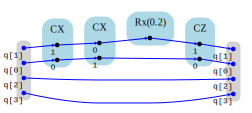

In [120]:
from pytket import Circuit
from pytket.utils import Graph

circ = Circuit(4)
circ.CX(0, 1)
circ.CX(1, 0)
circ.Rx(0.2, 1)
circ.CZ(0, 1)

print(circ.get_commands())
Graph(circ).get_DAG()

[TK1(1.5, 2.2, 0) q[0];, TK1(0, 0, 0.5) q[1];, CX q[1], q[0];, TK1(0, 0, 0.5) q[0];]
{q[0]: q[1], q[1]: q[0], q[2]: q[2], q[3]: q[3]}


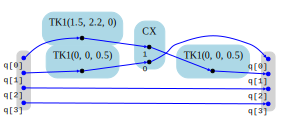

In [121]:
from pytket.passes import CliffordSimp

CliffordSimp().apply(circ)
print(circ.get_commands())
print(circ.implicit_qubit_permutation())
Graph(circ).get_DAG()

In [122]:
circ.replace_implicit_wire_swaps()

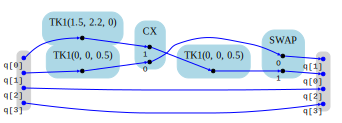

In [123]:
Graph(circ).get_DAG()
